<a href="https://www.kaggle.com/code/nikitasakale/individual-household-electric-power-consumption?scriptVersionId=154646147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/household-electric/household_power_consumption.txt


In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/household-electric/household_power_consumption.txt', sep=';',parse_dates={'DateTime' : ['Date', 'Time']}, index_col='DateTime')
df.head()

/tmp/ipykernel_21/4281156039.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/household-electric/household_power_consumption.txt', sep=';',parse_dates={'DateTime' : ['Date', 'Time']}, index_col='DateTime')
/tmp/ipykernel_21/4281156039.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv('/kaggle/input/household-electric/household_power_consumption.txt', sep=';',parse_dates={'DateTime' : ['Date', 'Time']}, index_col='DateTime')


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.shape

(2075259, 7)

In [5]:

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [7]:
#checking Missing values
df.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
#fill missing values row wise and makaing the chnages permanent in the original dataframe

df.ffill(axis=0,inplace=True)

In [9]:
#cross check whether all missing values are filled

df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
df['Sub_metering_3'][6840]

0.0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [12]:
df['Global_active_power'] = df['Global_active_power'].str.replace('?', 'nan')
df['Global_active_power'] = df['Global_active_power'].astype('float64')

df['Global_reactive_power'] = df['Global_reactive_power'].str.replace('?', 'nan')
df['Global_reactive_power'] = df['Global_reactive_power'].astype('float64')

df['Voltage'] = df['Voltage'].str.replace('?', 'nan')
df['Voltage'] = df['Voltage'].astype('float64')

df['Global_intensity'] = df['Global_intensity'].str.replace('?', 'nan')
df['Global_intensity'] = df['Global_intensity'].astype('float64')

df['Sub_metering_1'] = df['Sub_metering_1'].str.replace('?', 'nan')
df['Sub_metering_1'] = df['Sub_metering_1'].astype('float64')

df['Sub_metering_2'] = df['Sub_metering_2'].str.replace('?', 'nan')
df['Sub_metering_2'] = df['Sub_metering_2'].astype('float64')

In [13]:
df.isna().sum()

Global_active_power      69622
Global_reactive_power    69622
Voltage                  69622
Global_intensity         69622
Sub_metering_1           69622
Sub_metering_2           69622
Sub_metering_3               0
dtype: int64

In [14]:
#new = df['Time'].str.split(':', n = 2, expand = True)
#df['Time']=new[0]+':'+new[2]+':'+new[2]
#df['DateTime'] = df['Date']+' '+df['Time']
#df.drop(['Date', 'Time'], axis=1, inplace=True)

#df.head(10)

In [15]:
mean_Global_active_power = df['Global_active_power'].mean()
mean_Global_reactive_power = df['Global_reactive_power'].mean()
mean_Voltage = df['Voltage'].mean()
mean_Global_intensity = df['Global_intensity'].mean()
mean_Sub_metering_1 = df['Sub_metering_1'].mean()
mean_Sub_metering_2 = df['Sub_metering_2'].mean()
mean_Sub_metering_3 = df['Sub_metering_3'].mean()

In [16]:
df['Global_active_power'] = df['Global_active_power'].fillna(mean_Global_active_power)
df['Global_reactive_power'] = df['Global_reactive_power'].fillna(mean_Global_reactive_power)
df['Voltage'] = df['Voltage'].fillna(mean_Voltage)
df['Global_intensity'] = df['Global_intensity'].fillna(mean_Global_intensity)
df['Sub_metering_1'] = df['Sub_metering_1'].fillna(mean_Sub_metering_1)
df['Sub_metering_2'] = df['Sub_metering_2'].fillna(mean_Sub_metering_2)
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(mean_Sub_metering_3)

In [17]:
#eq1 = ((df['Global_active_power'])*1000/60)
#eq2 = (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])
df['Power_Consumption'] = ((df['Global_active_power'])*1000/60) - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])
df.drop(['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1, inplace=True)
df.head()

,Global_reactive_power,Voltage,Global_intensity,Power_Consumption
DateTime,,,,
2006-12-16 17:24:00,0.418,234.84,18.4,52.266667
2006-12-16 17:25:00,0.436,233.63,23.0,72.333333
2006-12-16 17:26:00,0.498,233.29,23.0,70.566667
2006-12-16 17:27:00,0.502,233.74,23.0,71.800000
2006-12-16 17:28:00,0.528,235.68,15.8,43.100000


In [18]:
df.isna().sum()

Global_reactive_power    0
Voltage                  0
Global_intensity         0
Power_Consumption        0
dtype: int64

In [19]:
hourly_df=df.resample('60T').mean()
day_df=df.resample('D').mean()
monthly_df=df.resample('M').mean()
df.shape

(2075259, 4)

In [20]:
hourly_df.head()

,Global_reactive_power,Voltage,Global_intensity,Power_Consumption
DateTime,,,,
2006-12-16 17:00:00,0.229000,234.643889,18.100000,52.992593
2006-12-16 18:00:00,0.080033,234.580167,15.600000,36.953333
2006-12-16 19:00:00,0.085233,233.232500,14.503333,38.553889
2006-12-16 20:00:00,0.075100,234.071500,13.916667,37.692778
2006-12-16 21:00:00,0.076667,237.158667,13.046667,33.307778


In [21]:
hourly_df.shape

(34589, 4)

In [22]:
day_df.head()

,Global_reactive_power,Voltage,Global_intensity,Power_Consumption
DateTime,,,,
2006-12-16,0.088187,236.243763,13.082828,37.073064
2006-12-17,0.156949,240.087028,9.999028,25.657407
2006-12-18,0.112356,241.231694,6.421667,13.214190
2006-12-19,0.104821,241.999313,4.926389,9.119375
2006-12-20,0.111804,242.308062,6.467361,14.156111


In [23]:
day_df.shape

(1442, 4)

In [24]:
monthly_df.head()

,Global_reactive_power,Voltage,Global_intensity,Power_Consumption
DateTime,,,,
2006-12-31,0.131384,241.441013,8.029336,20.812511
2007-01-31,0.132676,240.905098,6.546829,15.342992
2007-02-28,0.113637,240.519406,5.914505,13.864507
2007-03-31,0.114747,240.513476,5.572957,11.764343
2007-04-30,0.119222,239.523078,3.894183,8.679587


In [25]:
monthly_df.shape

(48, 4)

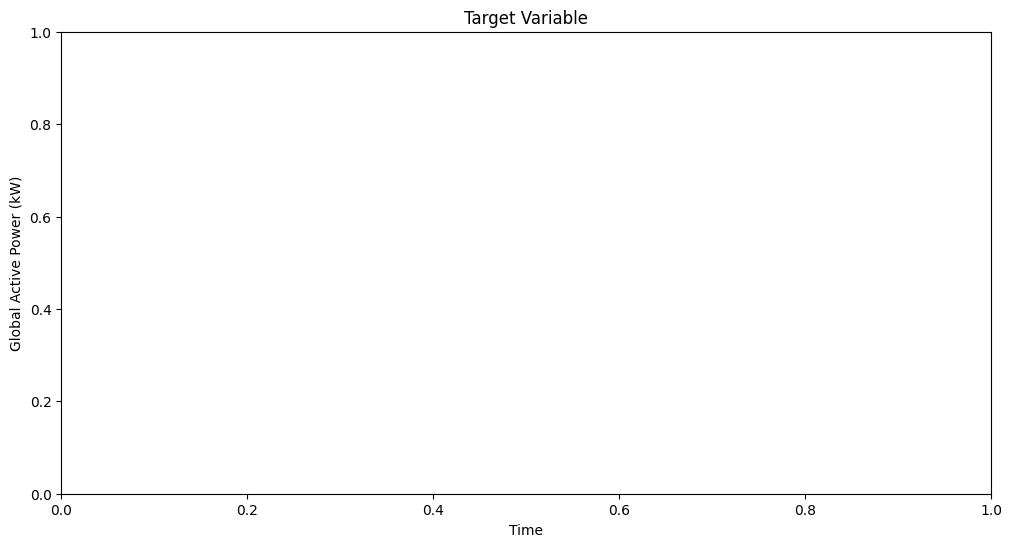

In [26]:
plt.figure(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title('Target Variable')
plt.show()

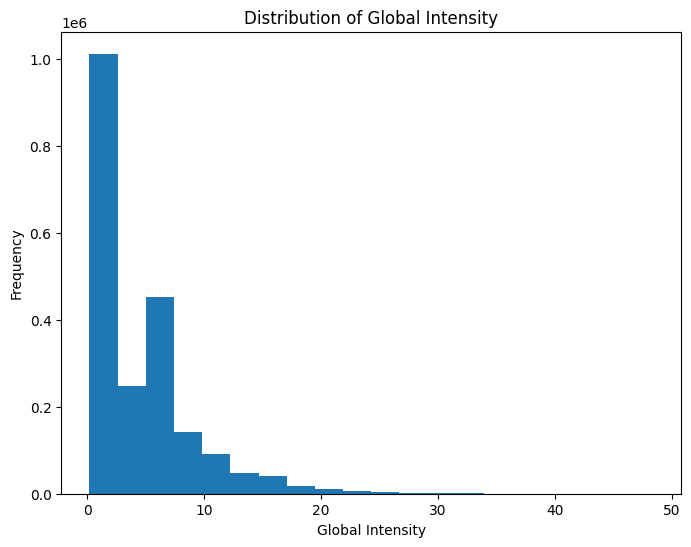

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(df['Global_intensity'], bins=20)
plt.xlabel('Global Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Global Intensity')
plt.show()

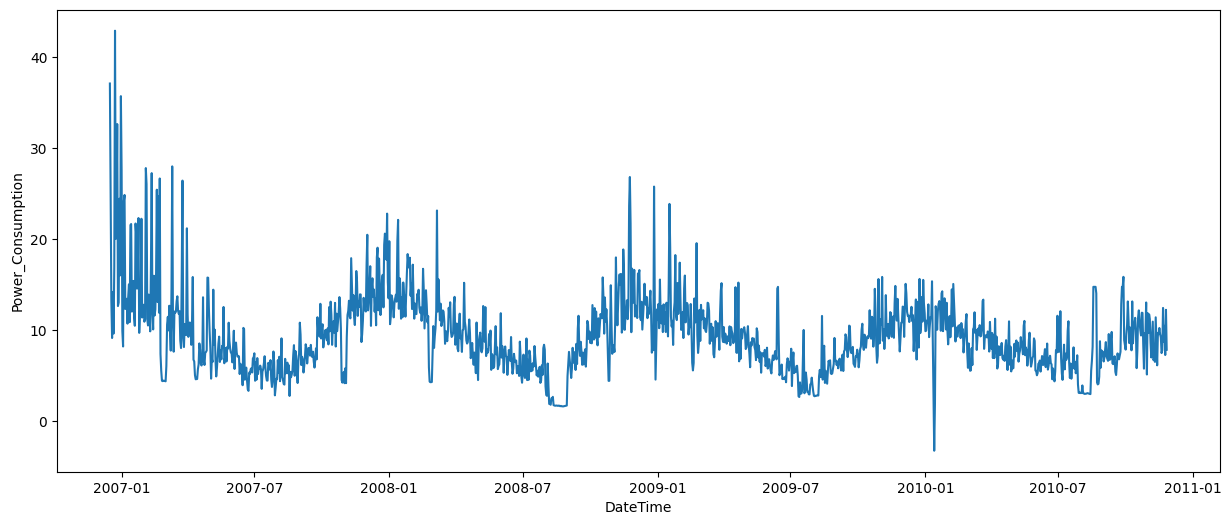

In [28]:
plt.figure(figsize=(15,6))
sns.lineplot(x='DateTime',y='Power_Consumption', data=day_df)
plt.show()